<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Function_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [54]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [55]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [56]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [57]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [58]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [59]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [60]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [61]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

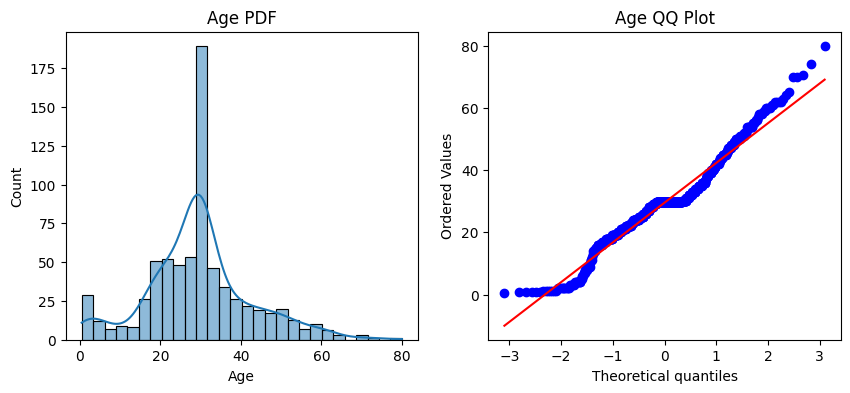

In [63]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(data=X_train,x=X_train['Age'],kde=True)
plt.title("Age PDF")


plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ Plot")
plt.show()

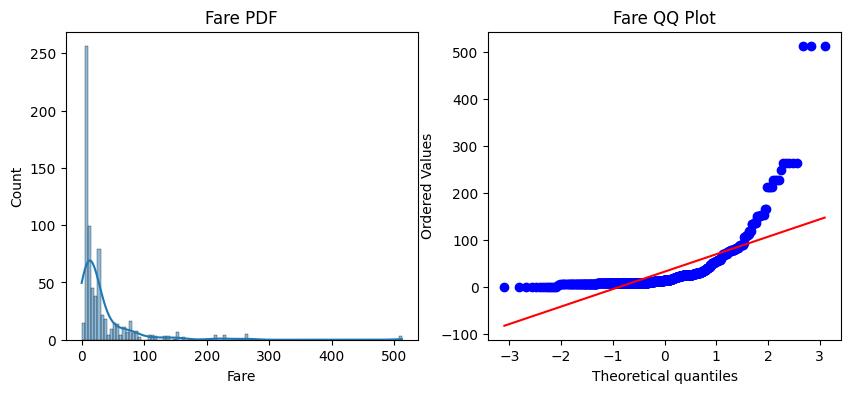

In [64]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(data=X_train,x=X_train['Fare'],kde=True)
plt.title("Fare PDF")


plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare QQ Plot")
plt.show()

In [65]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [66]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

print("Accuracy Score of LR : ",accuracy_score(Y_test,y_pred))
print("Accuracy Score of DT : ",accuracy_score(Y_test,y_pred2))

Accuracy Score of LR :  0.6480446927374302
Accuracy Score of DT :  0.6703910614525139


#Let's apply the function transformer :-

In [67]:
trf=FunctionTransformer(func=np.log1p)

In [68]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [69]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [70]:
clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

y_pred=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

print("Accuracy Score of LR : ",accuracy_score(Y_test,y_pred))
print("Accuracy Score of DT : ",accuracy_score(Y_test,y_pred2))

Accuracy Score of LR :  0.6815642458100558
Accuracy Score of DT :  0.6759776536312849


#Let's try to check the accuracy of models by cross validation :-

In [71]:
X_transformed=trf.fit_transform(X)

In [73]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("Accuracy Score of LR : ",np.mean(cross_val_score(clf,X_transformed,Y,cv=10)))
print("Accuracy Score of DT : ",np.mean(cross_val_score(clf2,X_transformed,Y,cv=10)))

Accuracy Score of LR :  0.678027465667915
Accuracy Score of DT :  0.6577528089887641


Lets plot the QQ plot of actual and transformed data

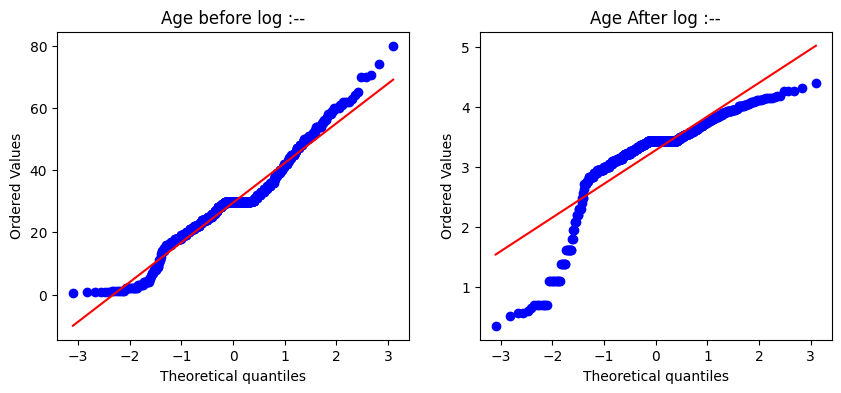

In [77]:
plt.figure(figsize=(10,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title("Age before log :--")


plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title("Age After log :--")
plt.show()

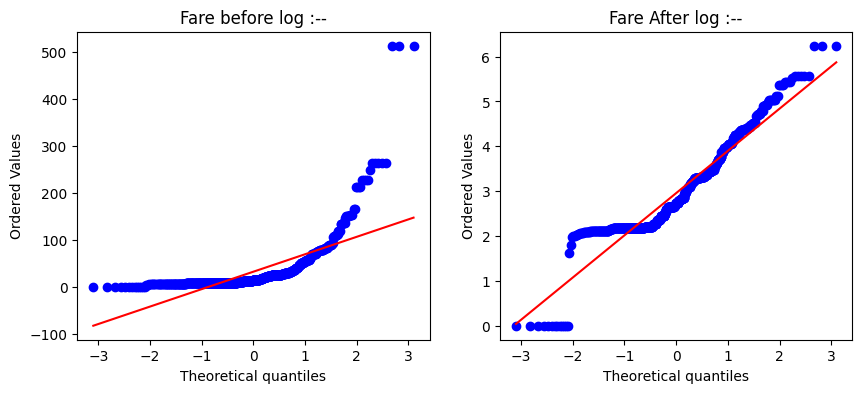

In [78]:
plt.figure(figsize=(10,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title("Fare before log :--")


plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title("Fare After log :--")
plt.show()

In [79]:
trf=ColumnTransformer([('log',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2=trf.fit_transform(X_train)
X_test_transformed2=trf.transform(X_test)

In [80]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed2,Y_train)
clf2.fit(X_train_transformed2,Y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred2=clf2.predict(X_test_transformed2)

print("Accuracy Score of LR : ",accuracy_score(Y_test,y_pred))
print("Accuracy Score of DT : ",accuracy_score(Y_test,y_pred2))

Accuracy Score of LR :  0.6703910614525139
Accuracy Score of DT :  0.664804469273743


In [82]:
X_transformed2=trf.fit_transform(X)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("Accuracy Score of LR : ",np.mean(cross_val_score(clf,X_transformed2,Y,cv=10)))
print("Accuracy Score of DT : ",np.mean(cross_val_score(clf2,X_transformed2,Y,cv=10)))

Accuracy Score of LR :  0.6712609238451936
Accuracy Score of DT :  0.6633208489388265


#we create a function for function transformer :--

In [83]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6611485642946316


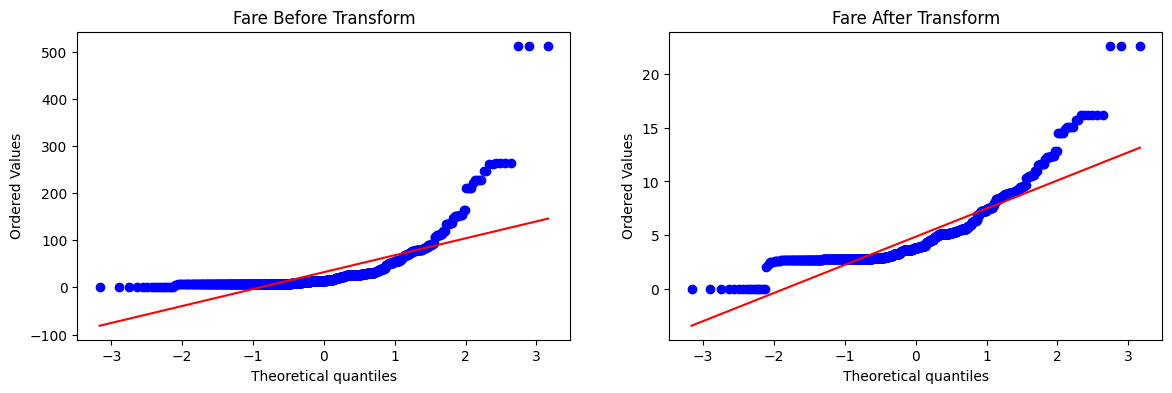

In [86]:
apply_transform(np.sqrt)


Accuracy 0.6184144818976279


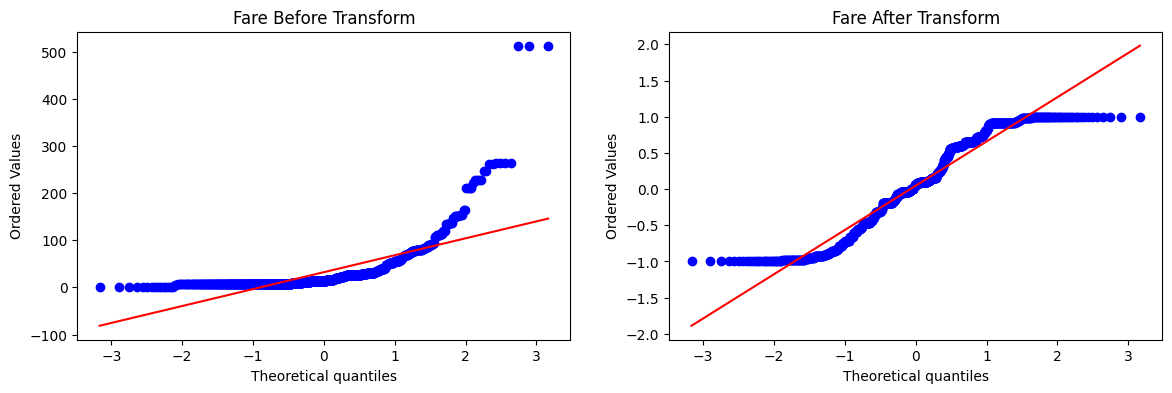

In [87]:
apply_transform(np.cos)

Accuracy 0.6442446941323345


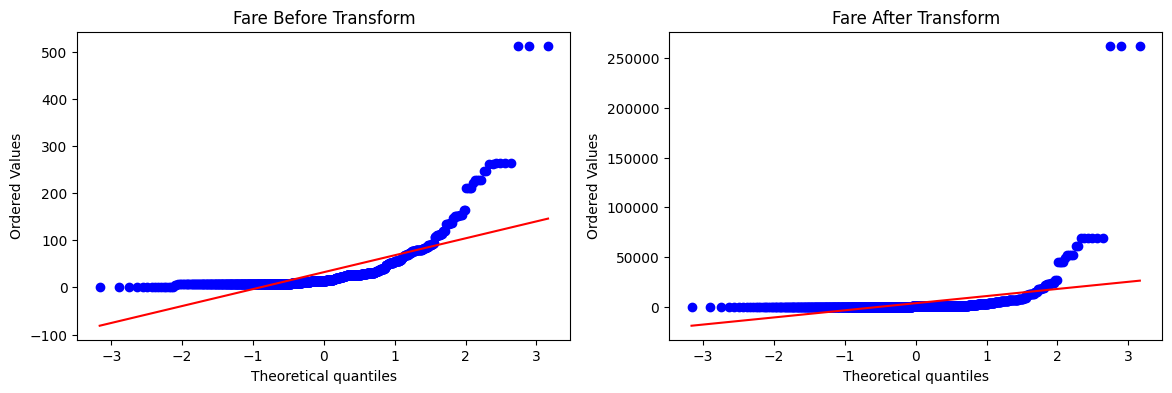

In [88]:
apply_transform(np.square)

Accuracy 0.61729088639201


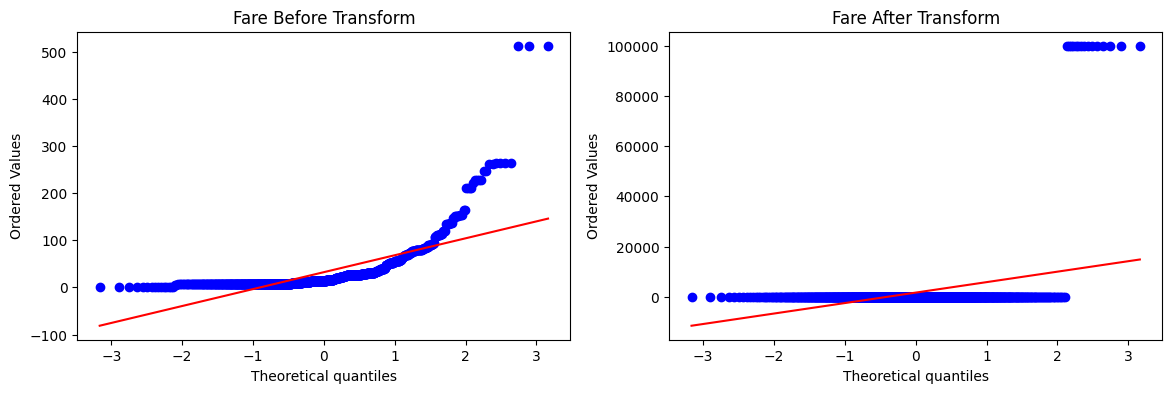

In [90]:
apply_transform(lambda x :1/(x +0.00001))

Accuracy 0.6195131086142323


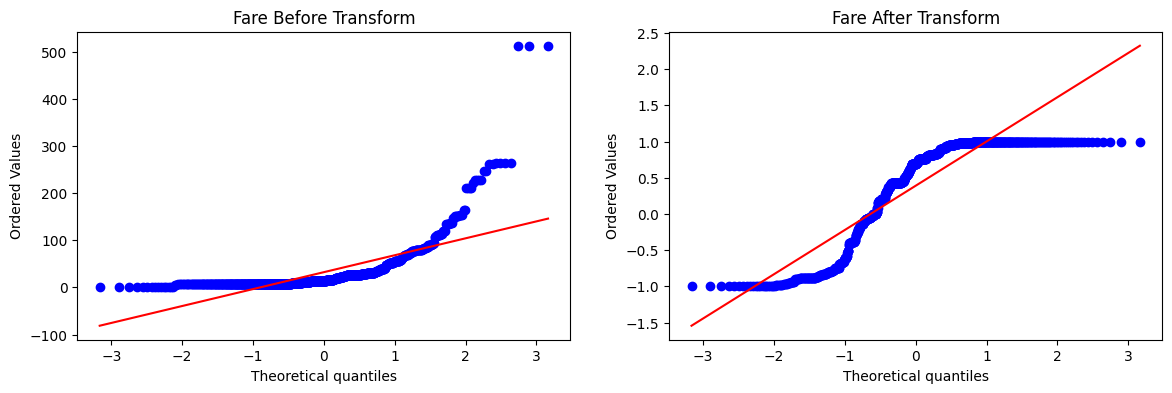

In [91]:
apply_transform(np.sin)